In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.stats import norm as normal_distr
from scipy.stats import poisson, gamma

from sklearn.mixture import GaussianMixture

from src.lib import *

In [3]:
path_to_dir_denoised = "./data/denoised_scunet/"
path_to_dir_raw = "./data/raw/"


filenames_raw = os.listdir(path_to_dir_raw)
filenames_den = os.listdir(path_to_dir_denoised)


filenames_raw.sort()
filenames_den.sort()


# df_metrics = pd.DataFrame(columns=['name image', 'metric', 'b2u', 'scunet gray 50', 'neat image'])
# df_metrics_new = pd.DataFrame(columns=['name image', 'metric', 'b2u', 'scunet gray 50', 'neat image'])

True

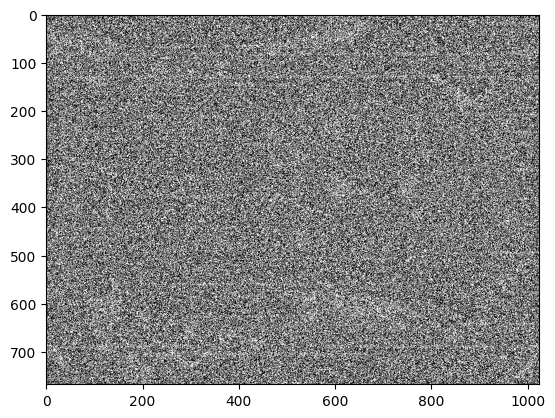

In [9]:
raw = cv2.imread(os.path.join(path_to_dir_raw, filenames_raw[0]), 0)
den = cv2.imread(os.path.join(path_to_dir_denoised, filenames_den[0]), 0)

noise = raw - den
noise - stats.mode(den.ravel())[0]
plt.imshow(noise, cmap='gray')
cv2.imwrite('./noise.png', noise)

In [ ]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_dissimilarity as dssim
from skimage.metrics import mutual_info_score
from skimage.measure import shannon_entropy
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.feature import canny
from skimage.exposure import is_low_contrast

# Загрузите оригинальное и обработанное изображения
original_image = cv2.imread('original_image.jpg')
processed_image = cv2.imread('processed_image.jpg')

# Проверьте, что изображения имеют одинаковый размер
if original_image.shape == processed_image.shape:
    # Рассчитайте PSNR
    # psnr_value = psnr(original_image, processed_image, data_range=255)

    # # Рассчитайте SSIM
    # ssim_value = ssim(original_image, processed_image, multichannel=True)

    # # Рассчитайте MSE
    # mse_value = mse(original_image, processed_image)

    # # Рассчитайте RMSE
    # rmse_value = np.sqrt(mse_value)

    # # Рассчитайте DSSIM
    # dssim_value = dssim(original_image, processed_image, data_range=255)

    # Рассчитайте Mutual Information
    original_gray = rgb2gray(original_image)
    processed_gray = rgb2gray(processed_image)
    # mutual_info = mutual_info_score(original_gray.ravel(), processed_gray.ravel())

    # Рассчитайте Entropy
    original_entropy = shannon_entropy(original_gray)
    processed_entropy = shannon_entropy(processed_gray)

    # Рассчитайте Canny Edge Error
    original_edges = canny(original_gray)
    processed_edges = canny(processed_gray)
    edge_error = np.mean(np.abs(original_edges.astype(float) - processed_edges.astype(float)))

    # Проверьте, является ли изображение низкоконтрастным
    is_low_contrast_original = is_low_contrast(original_image)
    is_low_contrast_processed = is_low_contrast(processed_image)


    print(f'Mutual Information: {mutual_info}')
    print(f'Entropy (Original): {original_entropy}')
    print(f'Entropy (Processed): {processed_entropy}')
    print(f'Canny Edge Error: {edge_error}')
    print(f'Is Low Contrast (Original): {is_low_contrast_original}')
    print(f'Is Low Contrast (Processed): {is_low_contrast_processed}')
else:
    print("Изображения имеют разные размеры, невозможно вычислить метрики.")

In [7]:
from skimage.feature import canny

def canny_edge_error(clean, original):
    original_edges = canny(original)
    processed_edges = canny(clean)
    edge_error = np.mean(np.abs(original_edges.astype(float) - processed_edges.astype(float)))

    return edge_error

In [3]:
dataset = 'dwell'
if dataset == 'dwell':
    files_raw = filenames_dwell
    files_b2u = filenames_dwell_b2u
    files_scunet = filenames_dwell_scunet
    files_neat = filenames_dwell_neat
    dir_raw = dwell_dir
    dir_b2u = dwell_b2u_dir
    dir_scunet = dwell_scunet_dir
    dir_neat = dwell_neat_dir


elif dataset == 'inegration':
    files_raw = filenames_inegration
    files_b2u = filenames_inegration_b2u
    files_scunet = filenames_inegration_scunet
    files_neat = filenames_inegration_neat

    dir_raw = inegration_dir
    dir_b2u = inegration_b2u_dir
    dir_scunet = inegration_scunet_dir
    dir_neat = inegration_neat_dir


# length = len(df_metrics)
# count = -1
# for i, j, k, l in zip(files_b2u, files_scunet, files_raw, files_neat):
#     # length = len(df_metrics)
#     length = len(df_metrics_new)

#     # count += 1
#     img_b2u = cv2.imread(os.path.join(dir_b2u, i), 0)
#     img_scunet = cv2.imread(os.path.join(dir_scunet, j), 0)
#     img_raw = cv2.imread(os.path.join(dir_raw, k), 0)
#     img_neat = cv2.imread(os.path.join(dir_neat, l), 0)


#     psnr_b2u = calculate_psnr(img_raw, img_b2u)
#     psnr_scunet = calculate_psnr(img_raw, img_scunet)
#     psnr_neat = calculate_psnr(img_raw, img_neat)

#     ssim_b2u = calculate_ssim(img_raw, img_b2u)
#     ssim_scunet = calculate_ssim(img_raw, img_scunet)
#     ssim_neat = calculate_ssim(img_raw, img_neat)

#     canny_b2u = canny_edge_error( img_b2u, img_raw)
#     canny_scunet = canny_edge_error(img_scunet, img_raw)
#     canny_neat = canny_edge_error(img_neat, img_raw)

#     df_metrics_new.loc[length] = [i[:-4], '', '', '', '']
#     df_metrics_new.loc[length+1] = ['', 'PSNR', psnr_b2u, psnr_scunet, psnr_neat]
#     df_metrics_new.loc[length+2] = ['', 'SSIM', ssim_b2u, ssim_scunet, ssim_neat]
#     df_metrics_new.loc[length+3] = ['', 'Canny Edge Error', canny_b2u, canny_scunet, canny_neat]



    # df_metrics.loc[length] = [i[:-4], 'PSNR', psnr_b2u, psnr_scunet, psnr_neat]
    # df_metrics.loc[length + 1] = [i[:-4], 'SSIM', ssim_b2u, ssim_scunet, ssim_neat]

    # print(i, j, k)


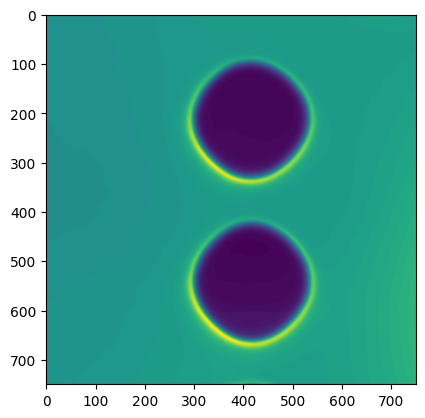

In [14]:
img_scunet = cv2.imread(os.path.join(dir_scunet, 'G121-C6-R1_15kV_044nA_appert-7_5us-one-frame.png'), 0)
plt.imshow(img_scunet[1200:1950, 1000:1750])


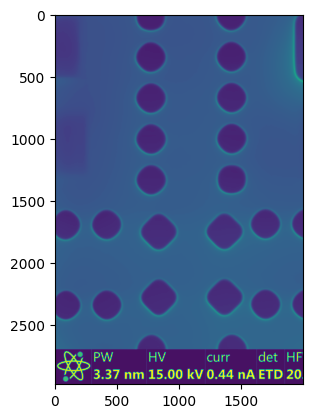

In [28]:
plt.imshow(img_scunet[1400:, :2000])

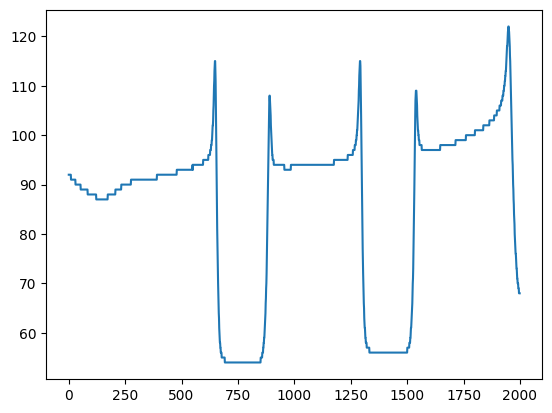

In [25]:
plt.plot(img_scunet[1400:1401, :2000].ravel())

(array([2.0210e+03, 2.7508e+04, 1.8480e+04, 7.0520e+03, 0.0000e+00,
        4.6940e+03, 3.3860e+03, 2.2960e+03, 0.0000e+00, 1.7430e+03,
        1.4300e+03, 1.2140e+03, 1.0760e+03, 0.0000e+00, 9.4600e+02,
        8.6900e+02, 8.1700e+02, 0.0000e+00, 7.5700e+02, 7.0100e+02,
        6.6500e+02, 0.0000e+00, 6.3300e+02, 6.0300e+02, 5.9700e+02,
        5.5700e+02, 0.0000e+00, 5.1700e+02, 5.1300e+02, 4.9400e+02,
        0.0000e+00, 4.6200e+02, 4.7700e+02, 4.5700e+02, 0.0000e+00,
        4.2100e+02, 4.3400e+02, 4.4700e+02, 3.6500e+02, 0.0000e+00,
        3.9100e+02, 4.1300e+02, 3.5400e+02, 0.0000e+00, 3.7500e+02,
        3.9300e+02, 3.4200e+02, 0.0000e+00, 3.7800e+02, 2.0162e+04,
        7.3986e+04, 6.8440e+04, 0.0000e+00, 4.4106e+04, 9.2939e+04,
        4.7354e+04, 0.0000e+00, 4.0137e+04, 2.3487e+04, 1.6070e+04,
        0.0000e+00, 1.2309e+04, 9.6360e+03, 7.6590e+03, 4.4230e+03,
        0.0000e+00, 1.7520e+03, 1.5210e+03, 1.2930e+03, 0.0000e+00,
        1.1310e+03, 1.0190e+03, 9.0500e+02, 0.00

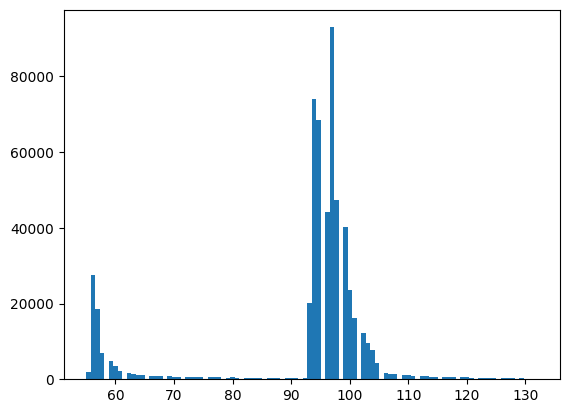

In [17]:
plt.hist(img_scunet[1200:1950, 1000:1750].ravel(), bins=100)

In [10]:
df_metrics_new

,name image,metric,b2u,scunet gray 50,neat image
0,G121-C6-R1_15kV_044nA_appert-7_1us-one-frame,,,,
1,,PSNR,21.4349,22.4418,22.5347
2,,SSIM,0.2221,0.2003,0.257
3,,Canny Edge Error,0.274778,0.274872,0.275158
4,G121-C6-R1_15kV_044nA_appert-7_2us-one-frame,,,,
5,,PSNR,23.6446,25.3525,25.7053
6,,SSIM,0.3058,0.2927,0.3405
7,,Canny Edge Error,0.10521,0.10541,0.104691
8,G121-C6-R1_15kV_044nA_appert-7_3us-one-frame,,,,
9,,PSNR,24.5948,26.8611,27.1718


In [20]:
ssim = calculate_ssim(img_neat, img_scunet)
ssim

0.9783

In [21]:
ssim = calculate_ssim(img_scunet, img_neat)
ssim

0.9744

In [25]:
df_psnr_scunetneat = pd.DataFrame(columns = ['name', '      ', 'ground truth = scunet', '           ','         ',  \
                                             '           ','ground truth = neat image', '            ', '            '])

In [18]:
test_psnr = ['G121-C6-R1_15kV_044nA_appert-7_4us-one-frame', 'G121-C6-R1_15kV_044nA_appert-7_5us-one-frame', 'G121-C6-R1_15kV_044nA_appert-7_1us-20-frames-int']

In [118]:
from math import log10, sqrt

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [26]:
dataset = 'dwell'
if dataset == 'dwell':
    files_raw = filenames_dwell
    files_scunet = filenames_dwell_scunet
    files_neat = filenames_dwell_neat
    dir_raw = dwell_dir
    dir_scunet = dwell_scunet_dir
    dir_neat = dwell_neat_dir
    test_scunet = [filenames_dwell_scunet[0], filenames_dwell_scunet[3], filenames_dwell_scunet[4]]
    test_neat = [filenames_dwell_neat[0],filenames_dwell_neat[3], filenames_dwell_neat[4]]
    test_raw = [filenames_dwell[0],filenames_dwell[3], filenames_dwell[4]]


elif dataset == 'inegration':
    files_raw = filenames_inegration
    files_scunet = filenames_inegration_scunet
    files_neat = filenames_inegration_neat

    dir_raw = inegration_dir
    dir_scunet = inegration_scunet_dir
    dir_neat = inegration_neat_dir

    test_scunet = [filenames_inegration_scunet[0]]
    test_neat = [filenames_inegration_neat[0]]
    test_raw = [filenames_inegration[0]]



# length = len(df_psnr_scunetneat)
count = -1
df_psnr_scunetneat.loc[0] = ['', 'PSNR noisy', 'PSNR scunet', 'SSIM noisy', 'SSIM scunet', \
                                      ' PSNR noisy ', 'PSNR neat', ' SSIM noisy ', 'SSIM neat']
for i, j, k in zip(test_scunet, test_neat, test_raw):
    length = len(df_psnr_scunetneat)
    # count += 1
    # img_b2u = cv2.imread(os.path.join(dir_b2u, i), 0)
    img_scunet = cv2.imread(os.path.join(dir_scunet, i), 0)
    img_raw = cv2.imread(os.path.join(dir_raw, k), 0)
    img_neat = cv2.imread(os.path.join(dir_neat, j), 0)

# gt = scunet, psnr для шумного и neat
    psnr_noisy_gtscunet = calculate_psnr(img_raw, img_scunet)
    psnr_neat_gtscunet = calculate_psnr(img_neat, img_scunet)

    ssim_noisy_gtscunet = calculate_ssim(img_raw, img_scunet)
    ssim_neat_gtscunet = calculate_ssim(img_neat, img_scunet)
    # psnr_noisy_gtscunet = PSNR(img_scunet, img_raw)
    # psnr_neat_gtscunet = PSNR(img_scunet, img_neat)

# gt = neat, psnr для шумного и scunet
    psnr_noisy_gtneat = calculate_psnr(img_raw, img_neat)
    psnr_scunet_gtneat = calculate_psnr(img_scunet, img_neat)

    ssim_noisy_gtneat = calculate_ssim(img_raw, img_neat)
    ssim_scunet_gtneat = calculate_ssim(img_scunet, img_neat)
    # psnr_noisy_gtneat = PSNR(img_raw, img_neat)
    # psnr_scunet_gtneat = PSNR(img_scunet, img_neat)


    df_psnr_scunetneat.loc[length] = [i[:-4], psnr_noisy_gtscunet, psnr_neat_gtscunet, 'SSIM noisy', 'SSIM scunet', ' PSNR noisy ', 'PSNR neat', ' SSIM noisy ', 'SSIM neat']

    # df_psnr_scunetneat.loc[length + count] = [i[:-4], '', psnr_noisy_gtscunet, psnr_neat_gtscunet, psnr_noisy_gtneat, psnr_scunet_gtneat]

In [27]:
df_psnr_scunetneat

,name,,ground truth = scunet,,,,ground truth = neat image,,
0,,PSNR noisy,PSNR scunet,SSIM noisy,SSIM scunet,PSNR noisy,PSNR neat,SSIM noisy,SSIM neat
1,,PSNR noisy,PSNR scunet,SSIM noisy,SSIM scunet,PSNR noisy,PSNR neat,SSIM noisy,SSIM neat
2,,PSNR noisy,PSNR scunet,SSIM noisy,SSIM scunet,PSNR noisy,PSNR neat,SSIM noisy,SSIM neat


In [87]:
# df_psnr[['ground truth = scunet']] = pd.concat([df_psnr_scunetneat['psnr шумное'], df_psnr_scunetneat['psnr scunet']], axis=1)